<a href="https://colab.research.google.com/github/abol-hasan/Custmer_Churn/blob/main/Customer_Churn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# **Preparing Data and Cleaning them**

In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df_data.shape

(7043, 21)

In [ ]:
df_data.drop(columns='customerID', inplace=True)

In [ ]:
df_data.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [ ]:
df_data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
pd.to_numeric(df_data.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
pd.to_numeric(df_data.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
pd.to_numeric(df_data.TotalCharges, errors='coerce').isna().sum()

11

In [ ]:
df_data[pd.to_numeric(df_data.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df_data.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [ ]:
df_data1 = df_data[df_data['TotalCharges'] !=' ']

In [ ]:
df_data1.shape

(7032, 20)

In [ ]:
df_data1.loc[:, 'TotalCharges'] = pd.to_numeric(df_data1.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
#df_data1['TotalCharges'] = pd.to_numeric(df_data1.TotalCharges)

In [ ]:
df_data1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
churn_no_tenur = df_data1[df_data1.Churn == 'No'].tenure
churn_yes_tenur = df_data1[df_data1.Churn == 'Yes'].tenure

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'number of customer')

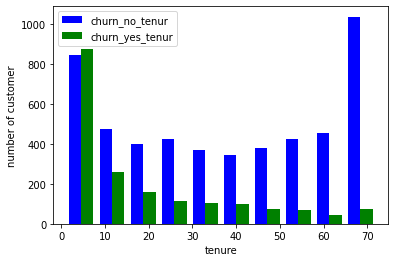

In [ ]:
plt.hist([churn_no_tenur, churn_yes_tenur], color=['blue', 'green'], label=['churn_no_tenur', 'churn_yes_tenur'])
plt.legend()
plt.xlabel('tenure')
plt.ylabel('number of customer')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'number of customer')

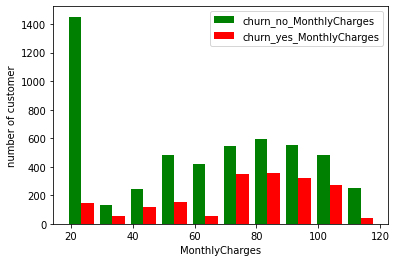

In [ ]:
churn_no_MonthlyCharges = df_data1[df_data1.Churn == 'No'].MonthlyCharges
churn_yes_MonthlyCharges = df_data1[df_data1.Churn == 'Yes'].MonthlyCharges
plt.hist([churn_no_MonthlyCharges, churn_yes_MonthlyCharges], color=['green', 'red'], label=['churn_no_MonthlyCharges', 'churn_yes_MonthlyCharges'])
plt.legend()
plt.xlabel('MonthlyCharges')
plt.ylabel('number of customer')

In [ ]:
for column in df_data1:
  print(f'{column} : {df_data1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [ ]:
df_data1.replace(['No internet service','No phone service'], value='No', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
for column in df_data1:
  print(f'{column} : {df_data1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [ ]:
yes_no = ['Partner','Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
          'PaperlessBilling', 'Churn']

In [ ]:
for col in yes_no:
  df_data1[col] = df_data1[col].map({'Yes': 1, 'No': 0})
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_data1.replace({'Female':1, 'Male':0}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
df_data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df_data2 = pd.get_dummies(df_data1, prefix=['InternetService', 'Contract', 'PaymentMethod'])


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_data2[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df_data2[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [ ]:
df_data2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0


In [ ]:
for col in df_data2.columns:
   print(f'column:{col},   uniqe_value:{df_data2[col].unique()}')

column:gender,   uniqe_value:[1 0]
column:SeniorCitizen,   uniqe_value:[0 1]
column:Partner,   uniqe_value:[1 0]
column:Dependents,   uniqe_value:[0 1]
column:tenure,   uniqe_value:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
column:PhoneServ

# **Create trainset, testset and building model and after that train it**

In [ ]:
X = df_data2.drop('Churn', axis=1)
Y = df_data2[['Churn']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
#x_train = x_train.sample(frac=1, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.Sequential(
    [
         layers.Dense(20,input_shape=(26,), activation='relu'),
         layers.Dense(15, activation='relu'),
         #layers.Dense(128, activation='relu'),
         #layers.Dense(128, activation='relu'),
         #layers.Dense(128, activation='relu'),
         layers.Dense(1, activation='sigmoid')
     
    ]
       )

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 0.5931 - accuracy: 0.6599
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.7836
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.7924
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.7991
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8020
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.7996
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8014
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8025
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8032
Epoch 10/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8016

In [ ]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4524 - accuracy: 0.7960


[0.4523935317993164, 0.7960199117660522]

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred = y_pred.flatten()

In [ ]:
y_predicted = [1 if i > 0.5  else 0  for i in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1029
           1       0.67      0.47      0.56       378

    accuracy                           0.80      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.78      0.80      0.78      1407



Text(69.0, 0.5, 'Truth')

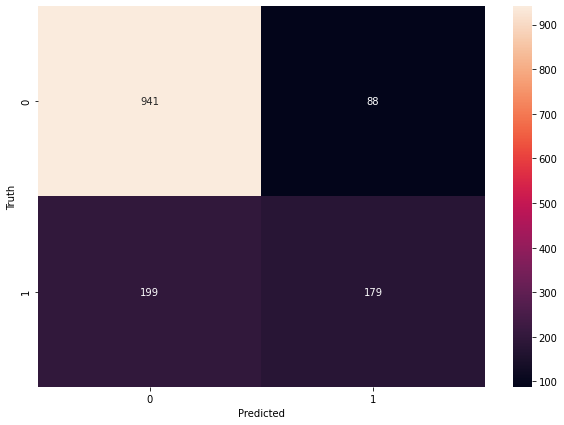

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model_0 = tf.keras.Sequential(
    [
         layers.Dense(20,input_shape=(26,), activation='relu'),
         layers.Dense(15, activation='relu'),
         layers.Dense(128, activation='relu'),
         layers.Dense(128, activation='relu'),
         layers.Dense(128, activation='relu'),
         layers.Dense(1, activation='sigmoid')
     
    ]
       )

In [ ]:
model_0.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
model_0.fit(x_train, y_train, epochs=50)

Epoch 1/50
176/176 [==============================] - 1s 2ms/step - loss: 0.4913 - accuracy: 0.7477
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.7881
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.7945
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.7991
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8039
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8023
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8002
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8073
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8105
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8107

In [ ]:
model_0.evaluate(x_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.7097 - accuracy: 0.7775


[0.7097319960594177, 0.7775408625602722]

In [ ]:
model_1 = tf.keras.Sequential(
    [
         layers.Dense(64,input_shape=(26,), activation='relu'),
         #layers.Dense(15, activation='relu'),
         layers.Dense(128, activation='relu'),
         layers.Dense(128, activation='relu'),
         layers.Dense(128, activation='relu'),
         layers.Dense(1, activation='sigmoid')
     
    ]
       )

In [ ]:
model_1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
model_1.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4533 - accuracy: 0.7758
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.7947
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8027
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8059
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8091
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8155
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8103
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8187
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3850 - accuracy: 0.8194
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3759 - accura

In [ ]:
model_1.evaluate(x_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 2.0937 - accuracy: 0.7377


[2.0937156677246094, 0.7377398610115051]